In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd

np.set_printoptions(linewidth=150)

In [2]:
original_data = pd.read_csv("DSL-StrongPasswordData.csv")
data = original_data.drop(["sessionIndex","rep"],axis=1)

data

,subject,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,UD.i.e,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,s002,0.1491,0.3979,0.2488,0.1069,0.1674,0.0605,0.1169,0.2212,0.1043,...,0.1349,0.1484,0.0135,0.0932,0.3515,0.2583,0.1338,0.3509,0.2171,0.0742
1,s002,0.1111,0.3451,0.2340,0.0694,0.1283,0.0589,0.0908,0.1357,0.0449,...,0.1412,0.2558,0.1146,0.1146,0.2642,0.1496,0.0839,0.2756,0.1917,0.0747
2,s002,0.1328,0.2072,0.0744,0.0731,0.1291,0.0560,0.0821,0.1542,0.0721,...,0.1621,0.2332,0.0711,0.1172,0.2705,0.1533,0.1085,0.2847,0.1762,0.0945
3,s002,0.1291,0.2515,0.1224,0.1059,0.2495,0.1436,0.1040,0.2038,0.0998,...,0.1457,0.1629,0.0172,0.0866,0.2341,0.1475,0.0845,0.3232,0.2387,0.0813
4,s002,0.1249,0.2317,0.1068,0.0895,0.1676,0.0781,0.0903,0.1589,0.0686,...,0.1312,0.1582,0.0270,0.0884,0.2517,0.1633,0.0903,0.2517,0.1614,0.0818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20395,s057,0.0884,0.0685,-0.0199,0.1095,0.1290,0.0195,0.0945,0.0757,-0.0188,...,0.1219,0.1383,0.0164,0.0820,0.1329,0.0509,0.1005,0.2054,0.1049,0.1047
20396,s057,0.0655,0.0630,-0.0025,0.0910,0.1148,0.0238,0.0916,0.0636,-0.0280,...,0.1008,0.0512,-0.0496,0.1037,0.0868,-0.0169,0.1445,0.2206,0.0761,0.1198
20397,s057,0.0939,0.1189,0.0250,0.1008,0.1122,0.0114,0.0721,0.0462,-0.0259,...,0.0913,0.1169,0.0256,0.0689,0.1311,0.0622,0.1034,0.2017,0.0983,0.0905
20398,s057,0.0923,0.1294,0.0371,0.0913,0.0990,0.0077,0.0992,0.0897,-0.0095,...,0.0882,0.0821,-0.0061,0.0576,0.0697,0.0121,0.0979,0.1917,0.0938,0.0931


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,1:],data["subject"],
                                                    stratify = data["subject"],
                                                    test_size=0.25)
X_train

,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,UD.i.e,H.e,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
18054,0.0602,0.6922,0.6320,0.0908,0.0773,-0.0135,0.1021,0.1145,0.0124,0.0702,...,0.1390,0.3877,0.2487,0.0924,0.0657,-0.0267,0.1108,0.4902,0.3794,0.0710
444,0.1201,0.1253,0.0052,0.1262,0.1677,0.0415,0.1115,0.1088,-0.0027,0.1210,...,0.1481,0.1288,-0.0193,0.1286,0.1436,0.0150,0.1006,0.2256,0.1250,0.0987
7454,0.0694,0.2638,0.1944,0.0536,0.1547,0.1011,0.0536,0.1154,0.0618,0.0581,...,0.0813,0.1239,0.0426,0.0489,0.2173,0.1684,0.0634,0.2324,0.1690,0.0589
1743,0.1045,0.1554,0.0509,0.0744,0.1209,0.0465,0.0544,0.0795,0.0251,0.0818,...,0.0854,0.0835,-0.0019,0.1426,0.1159,-0.0267,0.0813,0.2630,0.1817,0.0309
12665,0.1158,0.1221,0.0063,0.0683,0.1482,0.0799,0.0525,0.0501,-0.0024,0.0895,...,0.0995,0.1085,0.0090,0.0689,0.1435,0.0746,0.0873,0.1806,0.0933,0.1087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16022,0.0739,0.2405,0.1666,0.0995,0.4811,0.3816,0.0269,0.1050,0.0781,0.0528,...,0.0842,0.1544,0.0702,0.0873,0.2700,0.1827,0.0995,0.2576,0.1581,0.1018
9791,0.1218,0.1050,-0.0168,0.0901,0.1667,0.0766,0.1267,0.1792,0.0525,0.0998,...,0.0987,0.1708,0.0721,0.0869,0.1946,0.1077,0.0834,0.2765,0.1931,0.0837
9544,0.0818,0.1910,0.1092,0.0721,0.0972,0.0251,0.0605,0.0946,0.0341,0.1051,...,0.1006,0.0945,-0.0061,0.1081,0.0655,-0.0426,0.1004,0.2272,0.1268,0.0715
2413,0.1035,0.0997,-0.0038,0.0650,0.1666,0.1016,0.1006,0.1603,0.0597,0.0568,...,0.0628,0.1141,0.0513,0.0813,0.2148,0.1335,0.0578,0.1625,0.1047,0.0589


# Feature variance

In [4]:
from sklearn.feature_selection import VarianceThreshold

variance_threshold = VarianceThreshold()
variance_threshold.fit(X_train)

variance = variance_threshold.variances_

feature_variance = pd.DataFrame([variance],columns=X_train.columns,index=["variance"])
feature_variance.loc["variance ratio"] = feature_variance.loc["variance"] / feature_variance.loc["variance"].sum()

,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,UD.i.e,H.e,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
variance,0.000875,0.039933,0.042642,0.000755,0.014847,0.015413,0.000720,0.062274,0.063017,0.000942,...,0.001586,0.011469,0.010798,0.000954,0.022639,0.025555,0.000803,0.048213,0.050605,0.000755
variance ratio,0.001157,0.052811,0.056394,0.000999,0.019636,0.020384,0.000952,0.082357,0.083340,0.001245,...,0.002098,0.015168,0.014281,0.001262,0.029941,0.033797,0.001062,0.063762,0.066926,0.000998


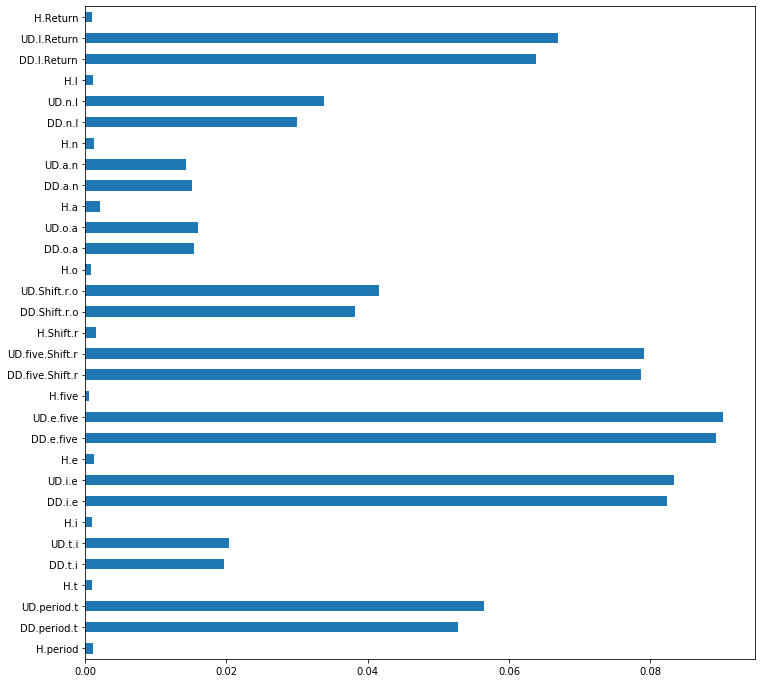

In [5]:
feature_variance.loc["variance ratio"].plot(kind="barh",figsize=(12,12))
feature_variance

# Encoder

In [101]:
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit

class AutoEncoder(Model):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            keras.layers.Dense(64, activation="relu"),
            keras.layers.Dense(32, activation="relu"),
            keras.layers.Dense(8, activation="relu")])

        self.decoder = tf.keras.Sequential([
            keras.layers.Dense(32, activation="relu"),
            keras.layers.Dense(64, activation="relu"),
            keras.layers.Dense(31, activation="sigmoid")])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
    
def train_autoencoder(train_data,validation_data,epochs=50,batch_size=16):

    autoencoder = AutoEncoder()

    autoencoder.compile(optimizer="nadam", loss="mae")

    history = autoencoder.fit(train_data,train_data,
                             epochs=epochs,
                             batch_size=batch_size,
                             shuffle=True,
                             verbose = 1,
                             validation_data=(validation_data, validation_data))

    return autoencoder, history

def show_history(history):
    fig1, ax1 = plt.subplots()
    ax1.plot(history.history["loss"], label="Training Loss")
    ax1.plot(history.history["val_loss"], label="Validation Loss")
    ax1.legend()
    plt.show()

Epoch 1/30

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

479/479 [==============================] - 2s 3ms/step - loss: 0.0874 - val_loss: 0.0663
Epoch 2/30
479/479 [==============================] - 2s 3ms/step - loss: 0.0564 - val_loss: 0.0564
Epoch 3/30
479/479 [==============================] - 2s 3ms/step - loss: 0.0539 - val_loss: 0.0551
Epoch 4/30
479/479 [==============================] - 2s 3ms/step - loss: 0.0537 - val_loss: 0.0552
Epoch 5/30
479/479 [==============================] - 2s 3ms/step - loss: 0.0535 - val_loss: 0.0553
Epoch 6/

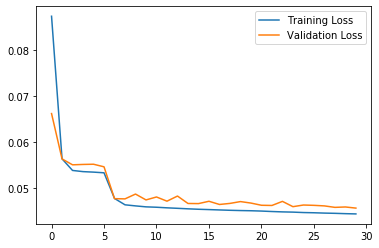

In [102]:
auto_encoder, history = train_autoencoder(X_train,X_test,epochs=30,batch_size=32)
show_history(history)

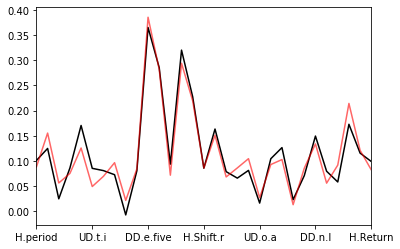

In [103]:
random_instance = X_train.iloc[150]
random_instance.plot(color="black",alpha=1)
result = auto_encoder.predict(random_instance.values.reshape(1,31)).squeeze()
plt.plot(result,"r",alpha=0.6)
plt.show()

In [104]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pyod.models.abod import ABOD

class Subject():
    def __init__(self, name, scaler, lof):
        self.name = name
        self.scaler = scaler
        self.lof = lof

def train_LOF(dataset):
    lof = ABOD(n_neighbors=5,contamination=0.15,method="fast")
    lof.fit(dataset)
    
    return lof

def reduce_dimensions(dataset, auto_encoder):
    return auto_encoder.encoder.predict(dataset)

def join_labels(dataset,labels):

    joined_dataset = pd.concat([labels,dataset],axis=1)
    joined_dataset.reset_index(drop=True,inplace=True)
    return joined_dataset


def train_subject(dataset,auto_encoder):
    encoded_dataset = reduce_dimensions(dataset,auto_encoder)
    
    ss = StandardScaler()
    scaled_dataset = ss.fit_transform(encoded_dataset)
    lof = train_LOF(scaled_dataset)
    
    return ss, lof
    
#train_subject(train_dataset.loc[train_dataset["subject"]=="s002"].drop("subject",axis=1), auto_encoder)


def train(dataset, subject_list, auto_encoder):
    subjects = dataset["subject"].unique()
    for subject in subjects:
        print("Training subject:",subject)
        subject_data = dataset.loc[dataset["subject"]==subject].sample(50,random_state=42)
        subject_data.drop("subject",axis=1,inplace=True)
        
        scaler, lof = train_subject(subject_data,auto_encoder)
        subject_list[subject] = Subject(subject,scaler,lof)
    return
        
subject_list = {}

train_dataset = join_labels(X_train,y_train)
        
train(train_dataset, subject_list, auto_encoder)

Training subject: s052
Training subject: s003
Training subject: s024
Training subject: s007
Training subject: s037
Training subject: s055
Training subject: s032
Training subject: s051
Training subject: s033
Training subject: s022
Training subject: s008
Training subject: s044
Training subject: s057
Training subject: s019
Training subject: s027
Training subject: s038
Training subject: s054
Training subject: s042
Training subject: s041
Training subject: s049
Training subject: s029
Training subject: s020
Training subject: s012
Training subject: s002
Training subject: s026
Training subject: s035
Training subject: s036
Training subject: s034
Training subject: s043
Training subject: s015
Training subject: s053
Training subject: s017
Training subject: s010
Training subject: s025
Training subject: s011
Training subject: s046
Training subject: s048
Training subject: s004
Training subject: s028
Training subject: s005
Training subject: s031
Training subject: s050
Training subject: s040
Training su

In [105]:
def specificity(labels,preds):
    tn, fp, fn, tp = confusion_matrix(labels,preds).ravel()
    return tn / (tn+fp)

def calculate_metrics(preds,labels):
    spec = specificity(labels, preds)
    recall = recall_score(labels, preds)
    
    return spec,recall


def test_subject(dataset,subject,auto_encoder):
    encoded_dataset = reduce_dimensions(dataset,auto_encoder)
    
    scaler = subject.scaler
    scaled_dataset = scaler.transform(encoded_dataset)
    lof = subject.lof
    preds = lof.predict(scaled_dataset)
    
    return preds

def test(dataset,subject_list,auto_encoder):
    
    spec_list = np.array([])
    recall_list = np.array([])
    
    for _,subject in subject_list.items():
        print("------------------")
        print("Testing subject:",subject.name)
        print("------------------")
        labels = dataset["subject"].copy()
        labels[labels != subject.name] = 1 #-1
        labels[labels == subject.name] = 0 # 1
        labels = labels.astype("int32")
        
        preds = test_subject(dataset.drop("subject",axis=1),subject,auto_encoder)
        
        spec,recall = calculate_metrics(preds,labels.values)
        print("Specificity(True negative rate) = {}".format(spec))
        print("Recall(True positive rate) = {}".format(recall))
        spec_list = np.append(spec_list,spec)
        recall_list = np.append(recall_list,recall)
    
    print("AVERAGE:")
    print("Specificity(True negative rate) = {}".format(spec_list.mean()))
    print("Recall(True positive rate) = {}".format(recall_list.mean()))
        
    return

test_dataset = join_labels(X_test,y_test)

test(test_dataset,subject_list,auto_encoder)

------------------
Testing subject: s052
------------------
Specificity(True negative rate) = 0.87
Recall(True positive rate) = 0.7506
------------------
Testing subject: s003
------------------
Specificity(True negative rate) = 0.89
Recall(True positive rate) = 0.5246
------------------
Testing subject: s024
------------------
Specificity(True negative rate) = 0.83
Recall(True positive rate) = 0.8786
------------------
Testing subject: s007
------------------
Specificity(True negative rate) = 0.85
Recall(True positive rate) = 0.638
------------------
Testing subject: s037
------------------
Specificity(True negative rate) = 0.76
Recall(True positive rate) = 0.7144
------------------
Testing subject: s055
------------------
Specificity(True negative rate) = 0.8
Recall(True positive rate) = 0.9132
------------------
Testing subject: s032
------------------
Specificity(True negative rate) = 0.87
Recall(True positive rate) = 0.3022
------------------
Testing subject: s051
----------------